In [221]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ydata_profiling import ProfileReport
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
data = pd.read_csv("C:\\Users\\Hp\\Downloads\\African_crises_dataset.csv")
data.head()

country_number country_code  country  year  systemic_crisis  exch_usd  \
0               1          DZA  Algeria  1870                1  0.052264   
1               1          DZA  Algeria  1871                0  0.052798   
2               1          DZA  Algeria  1872                0  0.052274   
3               1          DZA  Algeria  1873                0  0.051680   
4               1          DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises banking_crisis  
0                 0         crisis  
1                 0      no_crisis  
2                 0      no_crisis  
3                 0      no_crisis  
4                 0      no_crisis

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [103]:
data.describe()

country_number         year  systemic_crisis     exch_usd  \
count     1059.000000  1059.000000      1059.000000  1059.000000   
mean        35.613787  1967.767705         0.077432    43.140831   
std         23.692402    33.530632         0.267401   111.475380   
min          1.000000  1860.000000         0.000000     0.000000   
25%         15.000000  1951.000000         0.000000     0.195350   
50%         38.000000  1973.000000         0.000000     0.868400   
75%         56.000000  1994.000000         0.000000     8.462750   
max         70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    0.000000                         0.000000   
max                    1.000000                         1.000000   

       gdp_weighted_default  inflation_annual_cpi  independence  \
count           1059.000000          1.059000e+03   1059.000000   
mean               0.006402          2.084889e+04      0.776204   
std                0.043572          6.757274e+05      0.416984   
min                0.000000         -2.850214e+01      0.000000   
25%                0.000000          2.086162e+00      1.000000   
50%                0.000000          5.762330e+00      1.000000   
75%                0.000000          1.164405e+01      1.000000   
max                0.400000          2.198970e+07      1.000000   

       currency_crises  inflation_crises  
count      1059.000000       1059.000000  
mean          0.132200          0.129367  
std           0.349847          0.335765  
min           0.000000          0.000000  
25%           0.000000          0.000000  
50%           0.000000          0.000000  
75%           0.000000          0.000000  
max           2.000000          1.000000

In [104]:
data.isna().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [105]:
data.duplicated().sum()

np.int64(0)

In [106]:
def Plots(df) :
    figure = make_subplots(rows=2, cols=7)
    for i, column in enumerate(df.columns) :
        row = (i//7) + 1
        col = (i%7) + 1
        figure.add_trace(go.Box(y=df[column], name= column),row = row, col = col)
    figure.update_layout(width = 1000, showlegend = False)
    figure.show()

Plots(data)
 



In [107]:
numerical_values = data.select_dtypes(exclude='object')
numerical_values

country_number  year  systemic_crisis    exch_usd  \
0                  1  1870                1    0.052264   
1                  1  1871                0    0.052798   
2                  1  1872                0    0.052274   
3                  1  1873                0    0.051680   
4                  1  1874                0    0.051308   
...              ...   ...              ...         ...   
1054              70  2009                1  354.800000   
1055              70  2010                0  378.200000   
1056              70  2011                0  361.900000   
1057              70  2012                0  361.900000   
1058              70  2013                0  361.900000   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   
...                        ...                              ...   
1054                         1                                1   
1055                         1                                1   
1056                         1                                1   
1057                         1                                1   
1058                         1                                1   

      gdp_weighted_default  inflation_annual_cpi  independence  \
0                      0.0              3.441456             0   
1                      0.0             14.149140             0   
2                      0.0             -3.718593             0   
3                      0.0             11.203897             0   
4                      0.0             -3.848561             0   
...                    ...                   ...           ...   
1054                   0.0             -7.670000             1   
1055                   0.0              3.217000             1   
1056                   0.0              4.920000             1   
1057                   0.0              3.720000             1   
1058                   0.0              1.632000             1   

      currency_crises  inflation_crises  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0  
...               ...               ...  
1054                1                 0  
1055                0                 0  
1056                0                 0  
1057                0                 0  
1058                0                 0  

[1059 rows x 11 columns]

<Axes: >

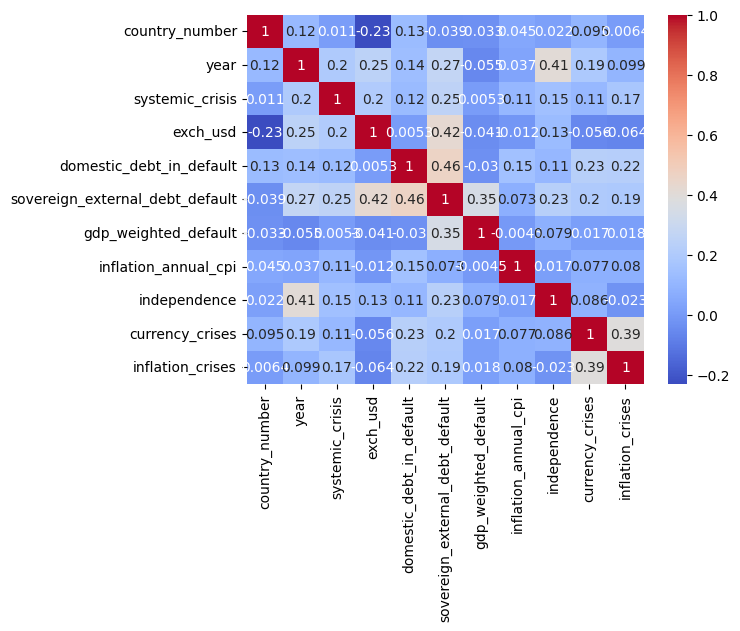

In [108]:
#Heatmap to check correlations 
correlation = sns.heatmap(numerical_values.corr(), annot=True, cmap='coolwarm')
correlation

In [111]:
df = data

In [112]:
df['banking_crisis'].unique()

array(['crisis', 'no_crisis'], dtype=object)

In [113]:
df['country_code'].unique()

array(['DZA', 'AGO', 'CAF', 'CIV', 'EGY', 'KEN', 'MUS', 'MAR', 'NGA',
       'ZAF', 'TUN', 'ZMB', 'ZWE'], dtype=object)

In [114]:
df.replace({'country_code':{'DZA' : 1, 'AGO':2, 'CAF':3, 'CIV':4, 'EGY': 5, 'KEN':6, 'MUS':7,
                             'MAR':8, 'NGA':9,'ZAF':10, 'TUN':11, 'ZMB':12, 'ZWE':13}},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   int64  
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

C:\Users\Hp\AppData\Local\Temp\ipykernel_16788\1924466246.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [115]:
df.replace({'banking_crisis':{'crisis' : 1, 'no_crisis':0}},inplace=True)
df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_16788\2751689714.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



country_number  country_code  country  year  systemic_crisis  exch_usd  \
0               1             1  Algeria  1870                1  0.052264   
1               1             1  Algeria  1871                0  0.052798   
2               1             1  Algeria  1872                0  0.052274   
3               1             1  Algeria  1873                0  0.051680   
4               1             1  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  
0                 0               1  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   int64  
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [117]:
df = df.drop(columns=['country'])

<Axes: >

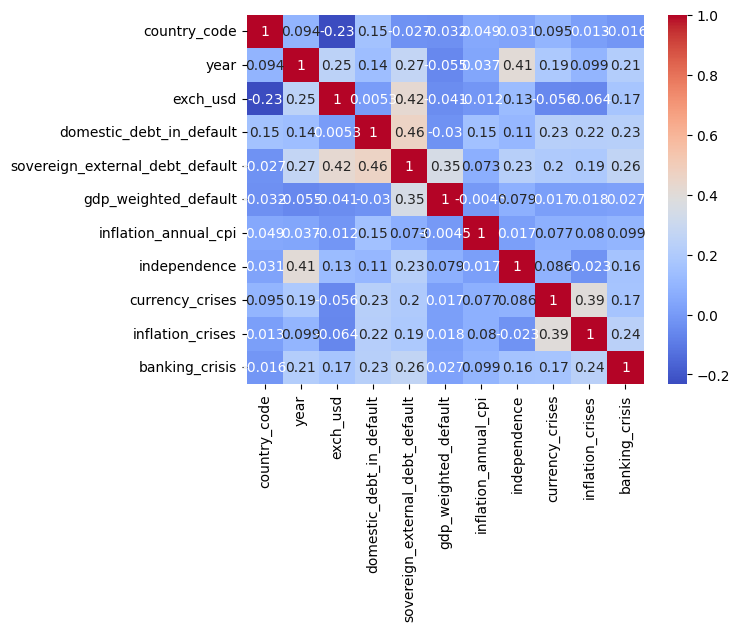

In [123]:
#Heatmap to check correlations 
numerical_values_df = df.select_dtypes(exclude='object')
corr_heatmap = sns.heatmap(numerical_values_df.corr(), annot=True, cmap='coolwarm')
corr_heatmap

In [124]:
# Z-scores for each feature
df_z_scores = df.apply(stats.zscore)

# Identify outliers (Z-score > 3 or < -3)
outliers = (df_z_scores > 3) | (df_z_scores < -3)
#store outliers in df_outliers
df_outliers = df[outliers.any(axis=1)]
#drop outliers from data with ~ operator 
df_cleaned = df[~outliers.any(axis=1)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 1 to 1039
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_code                     890 non-null    int64  
 1   year                             890 non-null    int64  
 2   exch_usd                         890 non-null    float64
 3   domestic_debt_in_default         890 non-null    int64  
 4   sovereign_external_debt_default  890 non-null    int64  
 5   gdp_weighted_default             890 non-null    float64
 6   inflation_annual_cpi             890 non-null    float64
 7   independence                     890 non-null    int64  
 8   currency_crises                  890 non-null    int64  
 9   inflation_crises                 890 non-null    int64  
 10  banking_crisis                   890 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 83.4 KB


In [81]:
#pandas profiling :
profiling_pandas = ProfileReport(df_cleaned, explorative=True, title='African crisis Data set')
profiling_pandas.to_file('African_crisis_dataset.html')
profiling_pandas.to_notebook_iframe()

c:\Users\Hp\Desktop\dataset\.venv\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

- Use df with outliers
- Use df_cleaned without outliers

In [134]:
df.columns

Index(['country_code', 'year', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises', 'banking_crisis'],
      dtype='object')

In [149]:
len(df.columns)

11

In [157]:
def create_histograms(df, columns, nbins=10, title='African Crisis'):
    rows = (len(columns) + 2) // 3
    fig = make_subplots(rows=rows, cols=3, subplot_titles=columns)
    for i, column in enumerate(columns):
        fig_hist = px.histogram(df, x=column, nbins=nbins)
        row = (i // 3) + 1
        col = (i % 3) + 1
        fig.add_trace(fig_hist['data'][0], row=row, col=col)
    fig.update_layout(height=rows*300, title_text=title, showlegend=False)
    
    fig.show()

create_histograms(df, columns=df.columns, nbins=5)


In [159]:
df

country_code  year    exch_usd  domestic_debt_in_default  \
0                1  1870    0.052264                         0   
1                1  1871    0.052798                         0   
2                1  1872    0.052274                         0   
3                1  1873    0.051680                         0   
4                1  1874    0.051308                         0   
...            ...   ...         ...                       ...   
1054            13  2009  354.800000                         1   
1055            13  2010  378.200000                         1   
1056            13  2011  361.900000                         1   
1057            13  2012  361.900000                         1   
1058            13  2013  361.900000                         1   

      sovereign_external_debt_default  gdp_weighted_default  \
0                                   0                   0.0   
1                                   0                   0.0   
2                                   0                   0.0   
3                                   0                   0.0   
4                                   0                   0.0   
...                               ...                   ...   
1054                                1                   0.0   
1055                                1                   0.0   
1056                                1                   0.0   
1057                                1                   0.0   
1058                                1                   0.0   

      inflation_annual_cpi  independence  currency_crises  inflation_crises  \
0                 3.441456             0                0                 0   
1                14.149140             0                0                 0   
2                -3.718593             0                0                 0   
3                11.203897             0                0                 0   
4                -3.848561             0                0                 0   
...                    ...           ...              ...               ...   
1054             -7.670000             1                1                 0   
1055              3.217000             1                0                 0   
1056              4.920000             1                0                 0   
1057              3.720000             1                0                 0   
1058              1.632000             1                0                 0   

      banking_crisis  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1054               1  
1055               0  
1056               0  
1057               0  
1058               0  

[1059 rows x 11 columns]

Logistic regression :

In [196]:
X = df.drop(columns=['banking_crisis'])
y = df['banking_crisis']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((847, 10), (212, 10), (847,), (212,))

In [197]:
losigtic_df = LogisticRegression()
losigtic_df.fit(X_train, y_train)

c:\Users\Hp\Desktop\dataset\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [198]:
#prediction
y_pred = losigtic_df.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [199]:
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred) 
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'accuracy : {accuracy}')
print(f'Precision : {precision}')
print(f'recall : {recall}')
print(f'f1 : {f1}')
print(f'Confusion Matrix {conf_matrix}')

accuracy : 0.9386792452830188
Precision : 1.0
recall : 0.2777777777777778
f1 : 0.43478260869565216
Confusion Matrix [[194   0]
 [ 13   5]]


<Axes: >

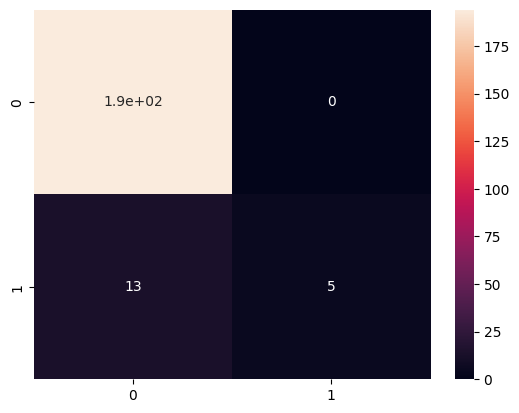

In [200]:
sns.heatmap(conf_matrix, annot=True)

K N N

In [201]:
X1 = df.drop(columns=['banking_crisis'])
y1 = df['banking_crisis']
X1_train, X1_test, y1_train,y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((847, 10), (212, 10), (847,), (212,))

In [202]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X1_train,y1_train)


KNeighborsClassifier(metric='euclidean')

In [203]:
y1_pred = knn.predict(X1_test)

In [204]:
accuracy_knn = accuracy_score(y1_test, y1_pred) 
precision_knn = precision_score(y1_test, y1_pred) 
recall_knn = recall_score(y1_test, y1_pred) 
f1_knn = f1_score(y1_test, y1_pred) 
conf_matrix_knn = confusion_matrix(y1_test, y1_pred)
print(f'accuracy : {accuracy_knn}')
print(f'Precision : {precision_knn}')
print(f'recall : {recall_knn}')
print(f'f1 : {f1_knn}')
print(f'Confusion Matrix {conf_matrix_knn}')

accuracy : 0.9339622641509434
Precision : 0.7
recall : 0.3888888888888889
f1 : 0.5
Confusion Matrix [[191   3]
 [ 11   7]]


<Axes: >

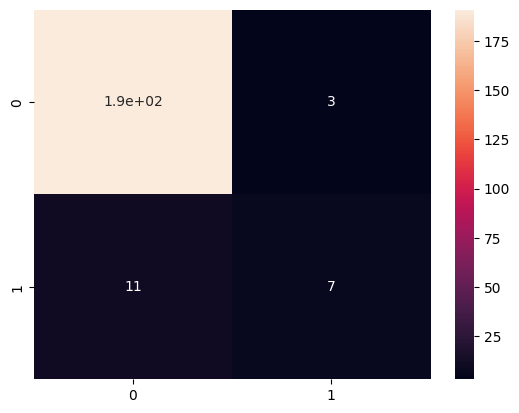

In [205]:
sns.heatmap(conf_matrix_knn, annot=True)

Decision Tree :

In [206]:
X2= df.drop(columns=['banking_crisis'])
y2 = df['banking_crisis']
X2_train, X2_test, y2_train,y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((847, 10), (212, 10), (847,), (212,))

In [212]:
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X2_train,y2_train)


DecisionTreeClassifier(max_depth=10)

In [213]:
y2_pred = knn.predict(X2_test)

In [214]:
accuracy_tree = accuracy_score(y2_test, y2_pred) 
precision_tree = precision_score(y2_test, y2_pred) 
recall_tree = recall_score(y2_test, y2_pred) 
f1_tree = f1_score(y2_test, y2_pred) 
conf_matrix_tree = confusion_matrix(y2_test, y2_pred)
print(f'accuracy : {accuracy_tree}')
print(f'Precision : {precision_tree}')
print(f'recall : {recall_tree}')
print(f'f2 : {f1_tree}')
print(f'Confusion Matrix {conf_matrix_tree}')

accuracy : 0.9339622641509434
Precision : 0.7
recall : 0.3888888888888889
f2 : 0.5
Confusion Matrix [[191   3]
 [ 11   7]]


<Axes: >

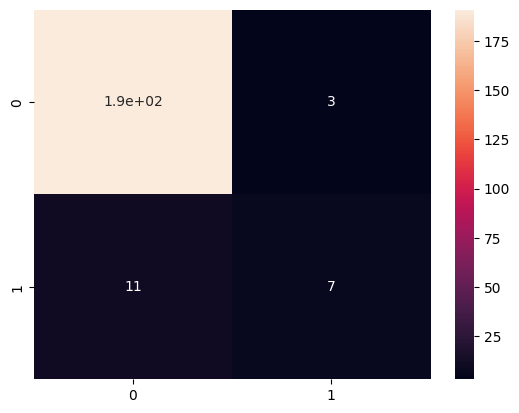

In [215]:
sns.heatmap(conf_matrix_tree, annot=True)

**Random Forest :**

In [217]:
X3= df.drop(columns=['banking_crisis'])
y3 = df['banking_crisis']
X3_train, X3_test, y3_train,y3_test = train_test_split(X3,y3, test_size=0.2, random_state=42)
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((847, 10), (212, 10), (847,), (212,))

In [218]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X3_train, y3_train)

RandomForestClassifier(n_estimators=10)

In [219]:
y3_pred = random_forest.predict(X3_test)

In [220]:
accuracy_forest = accuracy_score(y3_test, y3_pred) 
precision_forest = precision_score(y3_test, y3_pred) 
recall_forest = recall_score(y3_test, y3_pred) 
f1_forest = f1_score(y3_test, y3_pred) 
conf_matrix_forest = confusion_matrix(y3_test, y3_pred)
print(f'accuracy : {accuracy_forest}')
print(f'Precision : {precision_forest}')
print(f'recall : {recall_forest}')
print(f'f2 : {f1_forest}')
print(f'Confusion Matrix {conf_matrix_forest}')

accuracy : 0.9339622641509434
Precision : 0.6666666666666666
recall : 0.4444444444444444
f2 : 0.5333333333333333
Confusion Matrix [[190   4]
 [ 10   8]]


**Grid search :**

In [230]:
X4= df.drop(columns=['banking_crisis'])
y4 = df['banking_crisis']
X4_train, X4_test, y4_train,y4_test = train_test_split(X4,y4, test_size=0.2, random_state=42)
X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape

((847, 10), (212, 10), (847,), (212,))

In [252]:
model_grid_search = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth' : [None,10,20,30],
              'min_samples_split' : [2,5,10]}
grid_search = GridSearchCV(estimator= model_grid_search, param_grid=param_grid, cv=5, scoring='accuracy')
y_pred4 = grid_search.fit(X4_train, y4_train)

In [253]:
best_params = grid_search.best_params_ 
best_score = grid_search.best_score_ 
print("Best Parameters:", best_params) 
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9303585102680125


**Logistic regression :**

- accuracy : 0.9386792452830188
- Precision : 1.0
- recall : 0.2777777777777778
- f1 : 0.43478260869565216
- Confusion Matrix 
 [[194   0]
 [ 13   5]]


**KNN :**

- accuracy : 0.9339622641509434
- Precision : 0.7
- recall : 0.3888888888888889
- f1 : 0.5
- Confusion Matrix 
 [[191   3]
 [ 11   7]]

**Decision Tree :**
- accuracy : 0.9339622641509434
- Precision : 0.7
- recall : 0.3888888888888889
- f2 : 0.5
- Confusion Matrix 
 [[191   3]
 [ 11   7]] 
